In [5]:
# input
path = '/home/hermuba/data0118/phylo_profile_refseq/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]

# random select 50 for exploration
import numpy as np
selected = np.random.choice(len(onlyfiles), 50).tolist()
selected_files = [onlyfiles[f] for f in selected]

In [6]:
selected_files[0]

'GCF_000327045.1_ASM32704v1_protein'

In [10]:
import pandas as pd

def one_blastp_output(f):
    df = pd.read_csv(f, sep = '\t', names = ['qseqid', 'qlen', 'sseqid', 'slen', 'sstart', 'send', 'qstart', 'qend', 'evalue', 'bitscore', 'stitle','qtitle'])
    unique = df['qseqid'].unique()
    
    return(df)
    

In [13]:
d = one_blastp_output(path+selected_files[0])
d.dtypes

qseqid       object
qlen          int64
sseqid       object
slen          int64
sstart        int64
send          int64
qstart        int64
qend          int64
evalue      float64
bitscore    float64
stitle       object
qtitle       object
dtype: object

In [21]:
counts = d.groupby('qseqid').count()
with_many_hits = counts.loc[counts['qlen']>1].index

In [23]:
d.loc[d['qseqid'] == with_many_hits[0]]

,qseqid,qlen,sseqid,slen,sstart,send,qstart,qend,evalue,bitscore,stitle,qtitle
3839,562.10576.con.0005_121|562.10576,500,WP_015282243.1,725,9,545,9,487,2.200000e-36,147.5,WP_015282243.1 SAM-dependent DNA methyltransfe...,562.10576.con.0005_121|562.10576 562.10576.con...
3840,562.10576.con.0005_121|562.10576,500,WP_015280891.1,482,43,476,59,492,7.600000e-29,122.5,WP_015280891.1 SAM-dependent DNA methyltransfe...,562.10576.con.0005_121|562.10576 562.10576.con...


In [24]:
d.loc[d['qseqid'] == with_many_hits[1]]

,qseqid,qlen,sseqid,slen,sstart,send,qstart,qend,evalue,bitscore,stitle,qtitle
7256,562.22429.con.0008_53|562.22429,507,WP_041603854.1,397,44,265,17,235,1.600000e-42,167.9,WP_041603854.1 proline/glycine betaine ABC tra...,562.22429.con.0008_53|562.22429 562.22429.con....
7257,562.22429.con.0008_53|562.22429,507,WP_015279917.1,378,22,257,2,240,5.700000e-40,159.5,WP_015279917.1 polyamine ABC transporter ATP-b...,562.22429.con.0008_53|562.22429 562.22429.con....
7258,562.22429.con.0008_53|562.22429,507,WP_015282222.1,381,18,236,15,236,2.400000e-38,154.1,WP_015282222.1 sn-glycerol-3-phosphate ABC tra...,562.22429.con.0008_53|562.22429 562.22429.con....
7259,562.22429.con.0008_53|562.22429,507,WP_015280460.1,263,24,261,1,237,8.500000e-36,145.6,WP_015280460.1 amino acid ABC transporter ATP-...,562.22429.con.0008_53|562.22429 562.22429.con....
7260,562.22429.con.0008_53|562.22429,507,WP_015280677.1,241,1,215,1,214,1.900000e-35,144.4,WP_015280677.1 spermidine/putrescine ABC trans...,562.22429.con.0008_53|562.22429 562.22429.con....
7261,562.22429.con.0008_53|562.22429,507,WP_015281378.1,232,22,223,15,214,3.800000e-28,120.2,WP_015281378.1 ABC transporter ATP-binding pro...,562.22429.con.0008_53|562.22429 562.22429.con....
7262,562.22429.con.0008_53|562.22429,507,WP_015279248.1,258,25,215,12,208,5.000000e-28,119.8,WP_015279248.1 ABC transporter ATP-binding pro...,562.22429.con.0008_53|562.22429 562.22429.con....
7263,562.22429.con.0008_53|562.22429,507,WP_015281383.1,287,44,287,6,236,4.300000e-27,116.7,WP_015281383.1 phosphate ABC transporter ATP-b...,562.22429.con.0008_53|562.22429 562.22429.con....
7264,562.22429.con.0008_53|562.22429,507,WP_015281807.1,662,367,593,12,232,5.600000e-27,116.3,WP_015281807.1 dipeptide ABC transporter ATP-b...,562.22429.con.0008_53|562.22429 562.22429.con....
7265,562.22429.con.0008_53|562.22429,507,WP_015279624.1,242,31,237,15,219,9.500000e-27,115.5,WP_015279624.1 ABC transporter ATP-binding pro...,562.22429.con.0008_53|562.22429 562.22429.con....


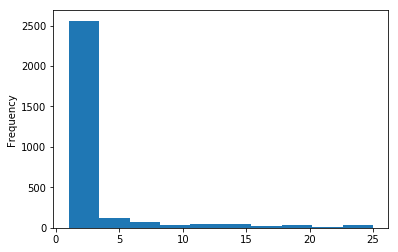

In [28]:
%matplotlib inline
counts['qlen'].plot(kind = 'hist')

# 1 genome in 1 genus?

In [51]:
names = ['assembly_accession','bioproject','biosample','wgs_master','refseq_category', 'taxid','species_taxid','organism_name','infraspecific_name','isolate', 'version_status','assembly_level','release_type','genome_rep','seq_rel_date','asm_name','submitter','gbrs_paired_asm paired_asm_comp','ftp_path','excluded_from_refseq','relation_to_type_material']
all_refseq = pd.read_csv('~/data0118/refseq/assembly_summary.txt',  comment = '#', names = names, sep = '\t')


/home/hermuba/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
all_refseq.columns

Index(['assembly_accession', 'bioproject', 'biosample', 'wgs_master',
       'refseq_category taxid', 'species_taxid', 'organism_name',
       'infraspecific_name', 'isolate version_status', 'assembly_level',
       'release_type', 'genome_rep', 'seq_rel_date', 'asm_name', 'submitter',
       'gbrs_paired_asm paired_asm_comp', 'ftp_path', 'excluded_from_refseq',
       'relation_to_type_material'],
      dtype='object')

In [54]:
all_refseq.shape

(120867, 21)

In [55]:
all_refseq['assembly_accession']

GCF_000010525.1    PRJNA224116
GCF_000007365.1    PRJNA224116
GCF_000007725.1    PRJNA224116
GCF_000009605.1     PRJNA57805
GCF_000021065.1    PRJNA224116
GCF_000021085.1    PRJNA224116
GCF_000090965.1    PRJNA224116
GCF_000174075.1    PRJNA224116
GCF_000183225.1    PRJNA224116
GCF_000183245.1    PRJNA224116
GCF_000183285.1    PRJNA224116
GCF_000183305.1    PRJNA224116
GCF_000217635.1    PRJNA224116
GCF_000225445.1    PRJNA224116
GCF_000225465.1    PRJNA224116
GCF_000521525.1    PRJNA224116
GCF_000521545.1    PRJNA224116
GCF_000521565.1    PRJNA224116
GCF_000521585.1    PRJNA224116
GCF_001280225.1    PRJNA224116
GCF_001648115.1    PRJNA224116
GCF_001700895.1    PRJNA224116
GCF_001939165.1    PRJNA224116
GCF_003099975.1    PRJNA224116
GCF_900016785.1    PRJNA224116
GCF_900128595.1    PRJNA224116
GCF_900128725.1    PRJNA224116
GCF_900128735.1    PRJNA224116
GCF_000218545.1    PRJNA224116
GCF_000020965.1    PRJNA224116
                      ...     
GCF_003316875.1    PRJNA224116
GCF_0032

In [53]:
len(names)

21

In [52]:
all_refseq.head()

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,assembly_level,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material
GCF_000010525.1,PRJNA224116,SAMD00060925,NaN,representative genome,438753,7,Azorhizobium caulinodans ORS 571,strain=ORS 571,NaN,latest,...,Major,Full,2007/10/16,ASM1052v1,University of Tokyo,GCA_000010525.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,assembly from type material
GCF_000007365.1,PRJNA224116,SAMN02604269,NaN,representative genome,198804,9,Buchnera aphidicola str. Sg (Schizaphis graminum),strain=Sg,NaN,latest,...,Major,Full,2002/07/02,ASM736v1,Uppsala Univ.,GCA_000007365.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000007725.1,PRJNA224116,SAMN02604289,NaN,representative genome,224915,9,Buchnera aphidicola str. Bp (Baizongia pistaciae),strain=Bp (Baizongia pistaciae),NaN,latest,...,Major,Full,2003/01/29,ASM772v1,Valencia Univ.,GCA_000007725.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000009605.1,PRJNA57805,SAMD00061095,NaN,reference genome,107806,9,Buchnera aphidicola str. APS (Acyrthosiphon pi...,strain=APS,Tokyo1998,latest,...,Major,Full,2004/05/11,ASM960v1,Rikken GSC,GCA_000009605.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN
GCF_000021065.1,PRJNA224116,SAMN02604133,NaN,na,561501,9,Buchnera aphidicola str. Tuc7 (Acyrthosiphon p...,strain=Tuc7,NaN,latest,...,Major,Full,2009/01/06,ASM2106v1,University of Arizona,GCA_000021065.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,NaN,NaN


In [56]:
all_refseq.loc[all_refseq['assembly_level']== 'complete genome']

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,assembly_level,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material
